# Lab 4 Clustering -> Part 1

In this lab I learned about two clustering algorithms they are :

1. K - means Clustering and
2. Gaussian Mixture Model 

using mathematical theory and numpy, and data was visualised using matplotlib.

Then I learned how to use the above two algorithms in real life using
scikit-learn and pandas.

New skills learned:

1. Pandas
2. Scikit-learn
3. Some scipy

# K - means Clustering

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on. 

Algorithm: 

1. Select K random centroids.
2. Assign each data point to the closest centroid.
3. Calculate new centroids and assign points according to new centroids.
4. Repeat 2 & 3 until convergence.
5. The model is ready

Properties of Algorithm:

1. Hard partitioning occurs.
2. We set the condition for convergence (EG: $\Delta \mu < precision $ )
3. Repeat training with various K to find optimal solutions.
4. Exploits mean of the data.

# Gaussian Mixture Model

If we assume that there are K-clusters and each cluster follows guassian model with mean $\mu_{k}$ and variance $\Sigma_{k}$ then 
we can group unlabled data into clusters.

Algorithm:
1. Initialise K centroids using K-means and find inital $\overline{\mu} ~ and  ~ \overline{\Sigma} = 1$. 
2. Give each feature vector a probability $p(\frac{k}{X=x_{i}})$ for each cluster k.
3. Re-estimate model $\lambda(x,w,\mu,\Sigma)$ using EM algorithm until convergence.
4. The model is ready.

Properties of Algorithm:

1. Soft partitioning is achieved.
2. Each feature vector gets assign to each cluster with a probability.
3. Repeat with various K to find optimal solution.
4. Exploits both mean and variance of data.

# Expectation Minimisation Algorithm

Definitions:

1. $\lambda$ is the tuple $(W,\mu,\Sigma)$
2. $g(X,\lambda)$ is the guassian ditribution for X = $x_{i}$ and $\lambda_{k}$
3. $p(\frac{k}{X=x_{i}})$ = $\frac{w_{k}*g(X=x_{i},\lambda=k)}{\Sigma_{k}w_{k}*g(X=x_{i},\lambda=k)}$

4. $p(X \mid \lambda)$ = $\Sigma_{k}w_{k}*g(X=x_{i},\lambda=k)$

re-estimations:

5. $\overline{w_{k}}$ = [ $\frac{\Sigma_{M}p(\frac{k}{X=x_{i}})}{M}$ ]

6. $\overline{\mu_{k}}$ = [ $\frac{\Sigma_{M}p(\frac{k}{X=x_{i}})*x_{i}}{\Sigma_{M}p(\frac{k}{X=x_{i}})}$ ]

7. $\overline{\Sigma}$ = [ $\frac{\Sigma_{M}p(\frac{k}{X=x_{i}}) * (x_{i}-\mu) * (x_{i}-\mu)^{T}}{ \Sigma_{M} p(\frac{k}{X=x_{i}})}$ ]

8. Convergence condition -> $|p(x \mid \lambda) - p(x \mid \overline{\lambda})| < \delta$

Algorithm:

1. Get initial model $\lambda$ from k-means or assume one.
2. Using given FV and $\lambda$ re-estimate model parameters leading to  $\overline{\lambda}$.
3. Repeat until convergence  condition is met.
4. At the end we have our final model $\lambda$.

# Q1) K-means

1. DATA GENERATION:

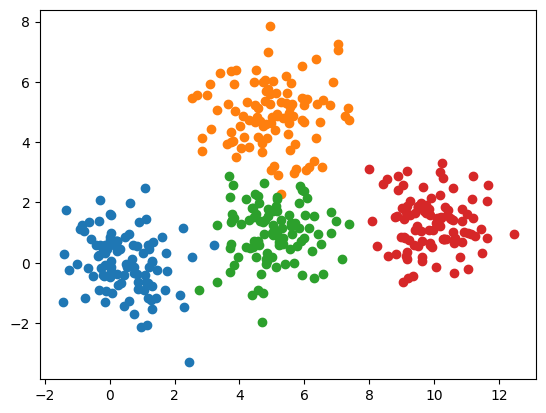

In [10]:
import numpy as np
import matplotlib.pyplot as plt

mean_1 = np.array([0.5,0])
mean_2 = np.array([5,5])
mean_3 = np.array([5,1])
mean_4 = np.array([10,1.5])

Sigma  = np.array([[1,0],[0,1]])
distribution_1     = np.random.multivariate_normal(mean_1,Sigma,100)
distribution_2     = np.random.multivariate_normal(mean_2,Sigma,100)
distribution_3     = np.random.multivariate_normal(mean_3,Sigma,100)
distribution_4     = np.random.multivariate_normal(mean_4,Sigma,100)
Distribution       = np.concatenate((distribution_1,distribution_2,distribution_3,distribution_4))

plt.figure()

plt.scatter(distribution_1[:,0], distribution_1[:,1])
plt.scatter(distribution_2[:,0], distribution_2[:,1])
plt.scatter(distribution_3[:,0], distribution_3[:,1])
plt.scatter(distribution_4[:,0], distribution_4[:,1])

Cluster Initialisation

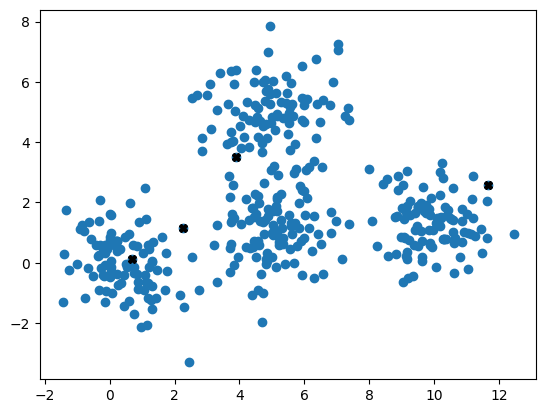

In [54]:


K = 4
Iterations = 10

rands = np.random.randint(0, Distribution.shape[0], K)
Centroids = Distribution[rands,:]


FV_tuple = np.zeros((Distribution.shape[0], K+2))

plt.scatter(Distribution[:,0],Distribution[:,1])
plt.plot(Centroids[:,0], Centroids[:,1], 'X', color='k')


Cluster assignment and re-estimation

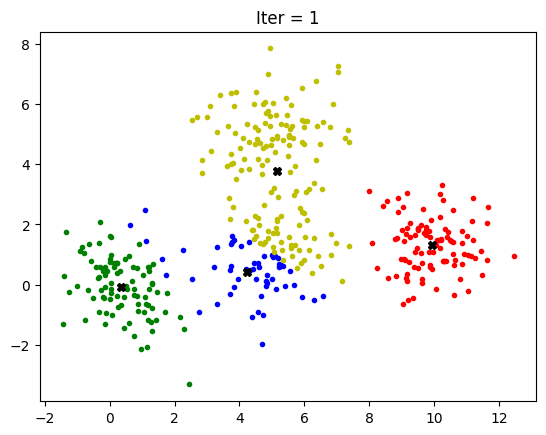

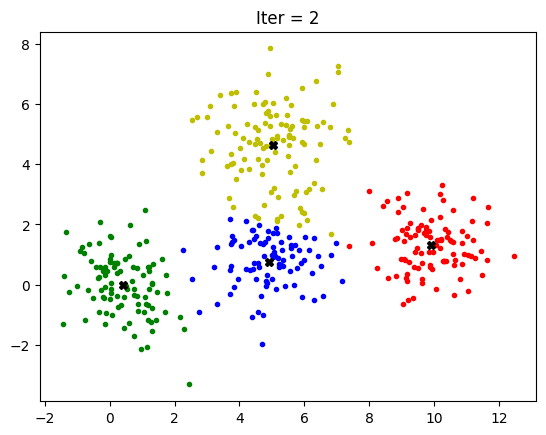

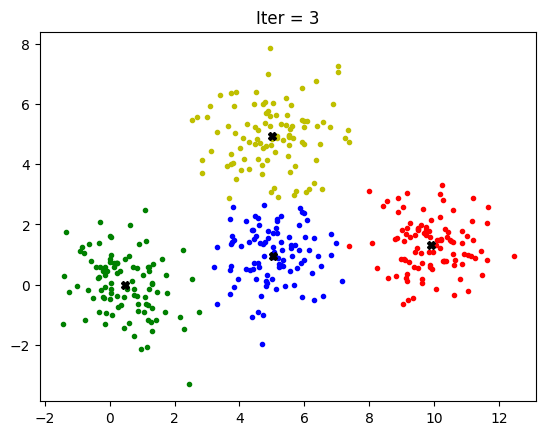

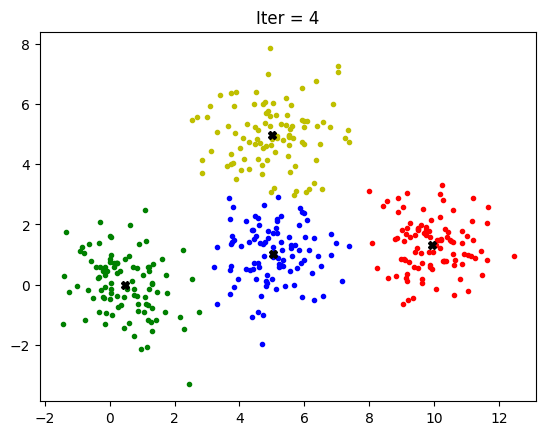

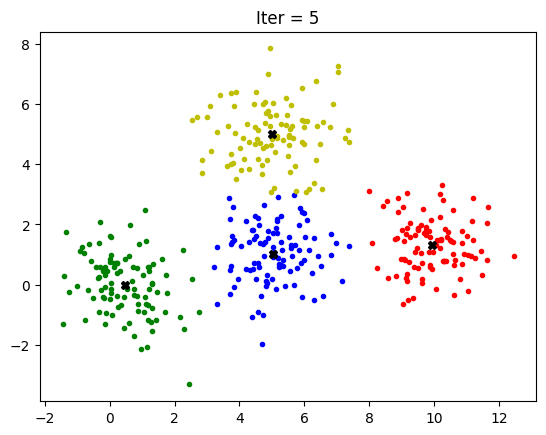

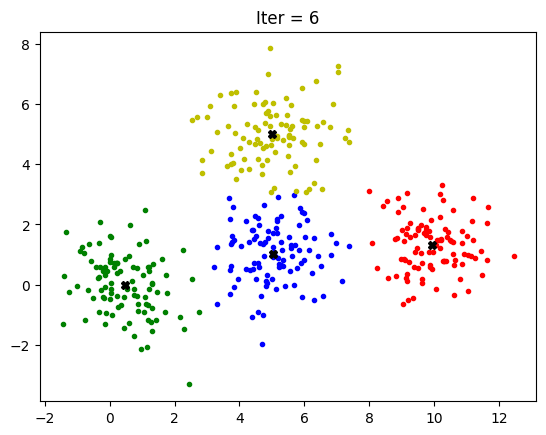

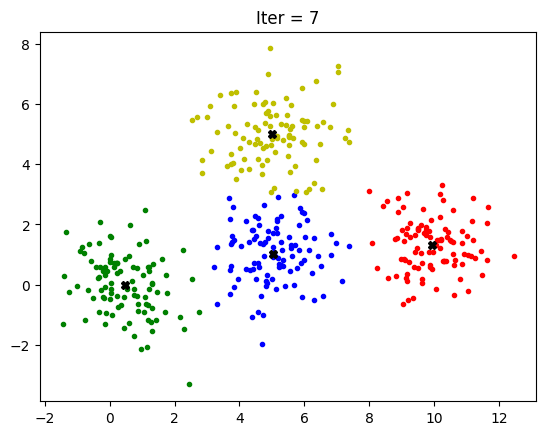

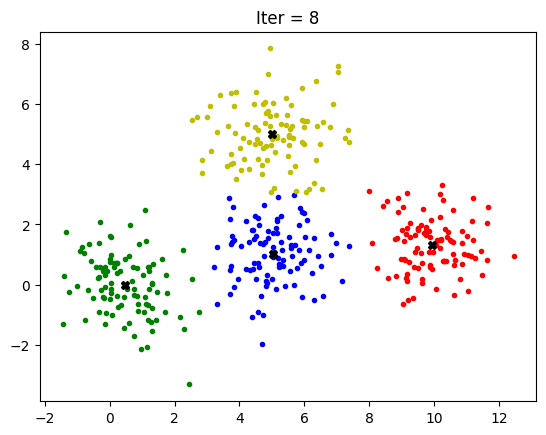

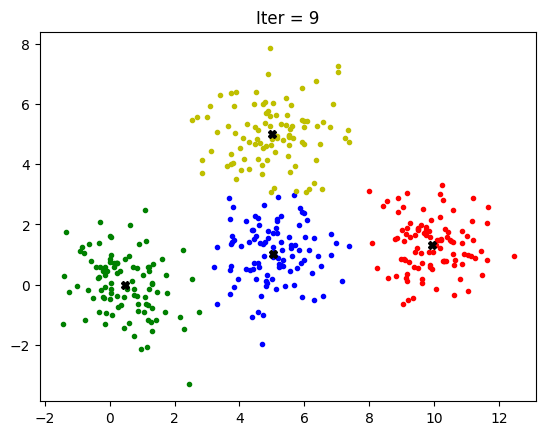

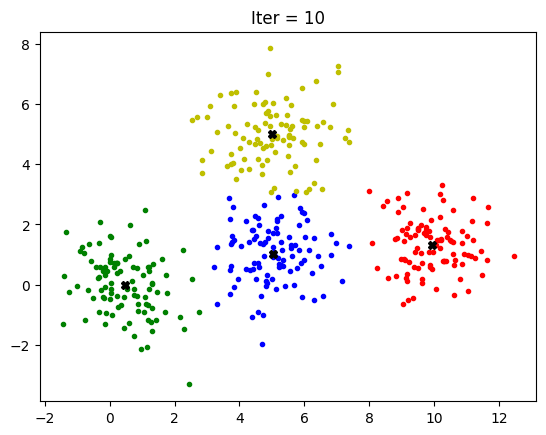

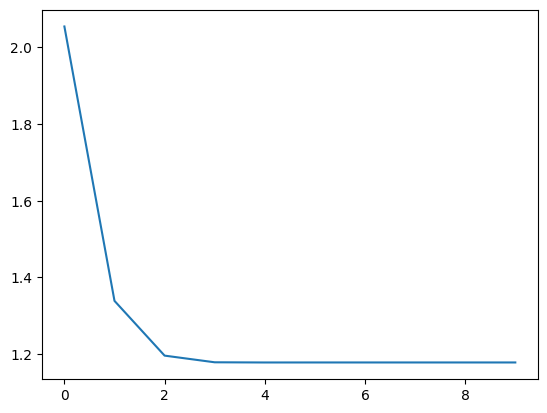

In [55]:
error = []
precision = 1e-10
colour=['r','g','b','y','k','m','c']

for o in range(Iterations):

    for i in range(Distribution.shape[0]):
        for j in range(K):
            FV_tuple[i,j] = np.linalg.norm(Distribution[i,:] - Centroids[j,:])

        distance = np.min(FV_tuple[i,:K])
        index    = int((np.where(distance==FV_tuple[i,:K])[0]))
        FV_tuple[i,K] = index
        FV_tuple[i,K+1] = distance 

    for i in range(K):
        index = np.where(FV_tuple[:,K]==i)
        Centroids[i,:] = np.mean(Distribution[index,:][0],axis=0)
    
    error.append(np.mean(FV_tuple[:,K+1]))

    plt.figure()

    for _ in range(K):
        ind = np.where(FV_tuple[:,K]==_)
        plt.plot(Distribution[ind,0],Distribution[ind,1],'.', color=colour[_] )

    
    plt.plot(Centroids[:,0], Centroids[:,1], 'X', color='k')
    plt.title(f"Iter = {o + 1}")    

plt.figure()
plt.plot(error)

In [97]:
import sklearn
from sklearn import metrics

pred=FV_tuple[:,K]

cluster_1 = np.tile([1], distribution_1.shape[0])
cluster_2 = np.tile([2], distribution_2.shape[0])
cluster_3 = np.tile([3], distribution_3.shape[0])
cluster_4 = np.tile([4], distribution_4.shape[0])
cluster   = np.concatenate((cluster_1,cluster_2, cluster_3, cluster_4))


print('Performance=',metrics.homogeneity_score(pred,cluster))

Performance= 0.9554955094923293


# Gaussian Mixture Models Clustering

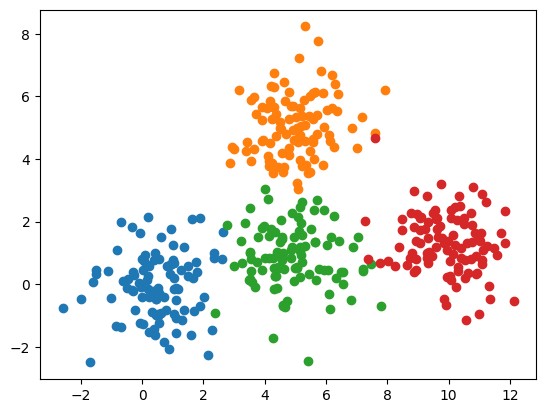

In [111]:
import numpy as np
import matplotlib.pyplot as plt

mean_1 = np.array([0.5,0])
mean_2 = np.array([5,5])
mean_3 = np.array([5,1])
mean_4 = np.array([10,1.5])

Sigma  = np.array([[1,0],[0,1]])
distribution_1     = np.random.multivariate_normal(mean_1,Sigma,100)
distribution_2     = np.random.multivariate_normal(mean_2,Sigma,100)
distribution_3     = np.random.multivariate_normal(mean_3,Sigma,100)
distribution_4     = np.random.multivariate_normal(mean_4,Sigma,100)
Distribution       = np.concatenate((distribution_1,distribution_2,distribution_3,distribution_4))

Distribution       = ((Distribution - (np.mean(Distribution,axis=0)))/(np.std(Distribution, axis=0)))

plt.figure()

plt.scatter(distribution_1[:,0], distribution_1[:,1])
plt.scatter(distribution_2[:,0], distribution_2[:,1])
plt.scatter(distribution_3[:,0], distribution_3[:,1])
plt.scatter(distribution_4[:,0], distribution_4[:,1])

In [112]:
dimension = Distribution.shape[1]
mean = np.random.randint(0, Distribution.shape[0], K)
mean = Distribution[mean, :]
mean = mean.T

COV = np.zeros((dimension, dimension, K))
for i in range(K):
    COV[:,:,i] = np.eye(dimension)*np.max(Distribution, axis=None)

W  = np.ones((K,1)) / K

In [113]:
from scipy.stats import multivariate_normal


def calculate_Expectation(mean, COV, W):
    ret_val = np.zeros((len(Distribution), K))

    for i in range(K):
        data_pt = 0

        for x in Distribution:

            denominator = 0

            N = multivariate_normal.pdf(x, mean=mean[:,i], cov=COV[:,:,i])

            ret_val[data_pt][i] = W[i]*N

            for j in range(K):
                denominator += W[j] * (multivariate_normal.pdf(x,mean=mean[:,j], cov=COV[:,:,j])+1e-11)
            
            ret_val[data_pt][i] = ret_val[data_pt][i]/denominator
            data_pt += 1

    return ret_val


In [114]:
def re_estimation(lamda):
    [data_pt, K] = lamda.shape

    dimension = Distribution.shape[1]

    N = np.sum(lamda,axis=0)

    W = N/data_pt

    mean = np.zeros((K, dimension))

    for k in range(K):

        t = lamda[:,k]
        temp = Distribution * t[:,None]
        mean[k] = (1/N[k])*np.sum(temp, axis=0)

    mean = mean.T

    COV = np.zeros((dimension, dimension, K))

    for k in range(K):
        for n in range(data_pt):
            a = Distribution[n,:] - mean[:,k]
            b = a @ a.T
            c = lamda[n,k] * b
            COV[:,:,k] += c

    ret = [mean, COV, W]

    err = 0
    log_error = 0
    """
    for pt in range(data_pt):
        for k in range(K):
            err += W[k]*(multivariate_normal.pdf(Distribution[pt,:],mean=mean[:,k], cov=COV[:,:,k]))
        log_error += np.log(err)
    """
    return ret, log_error


# EM ALGORITHM

/tmp/ipykernel_656/2409286477.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


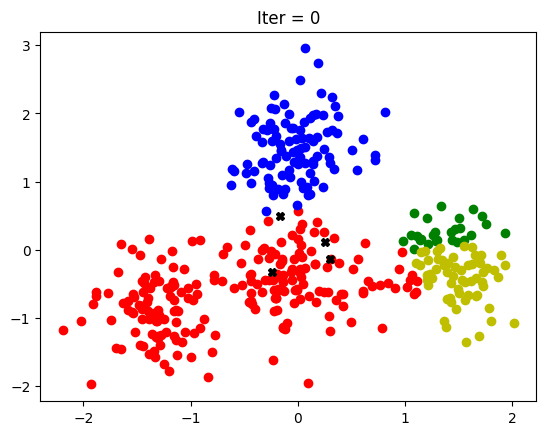

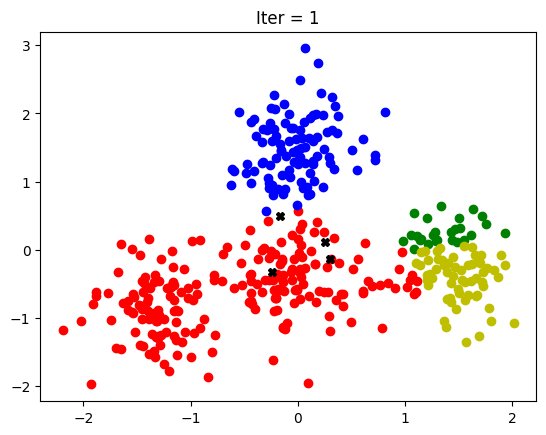

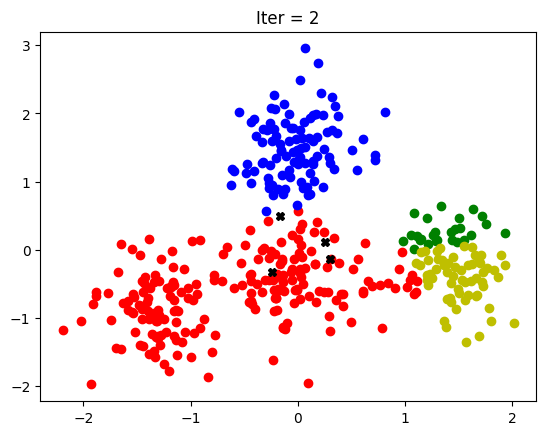

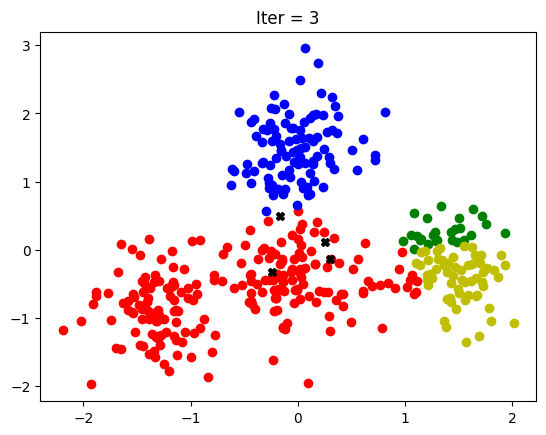

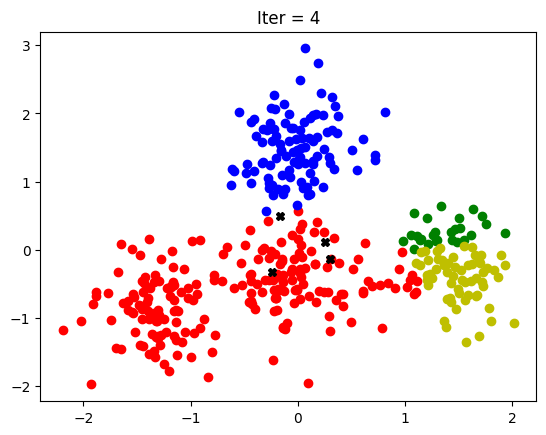

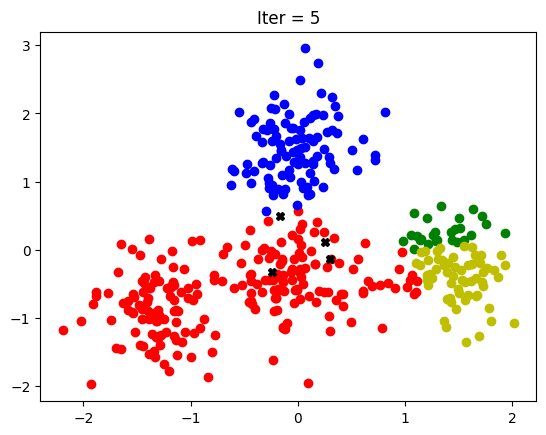

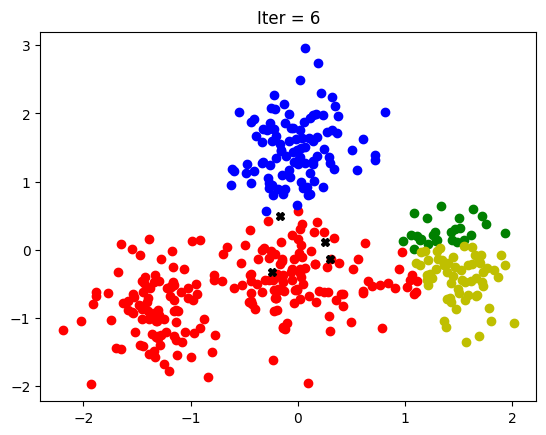

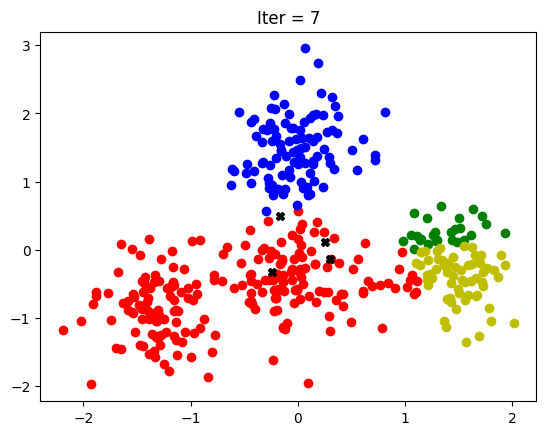

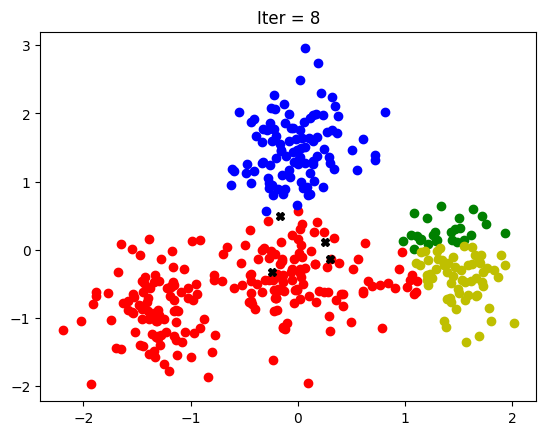

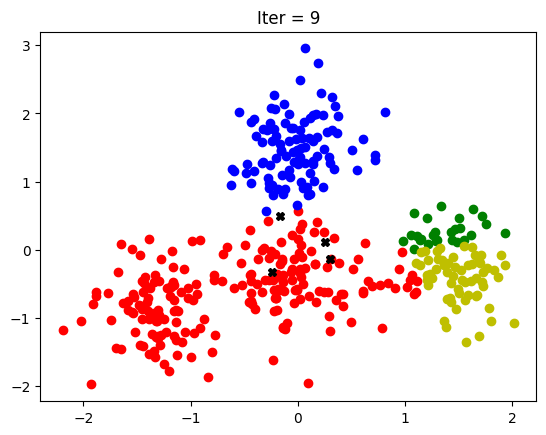

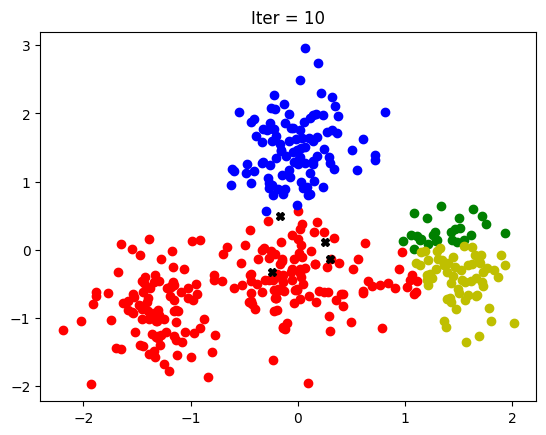

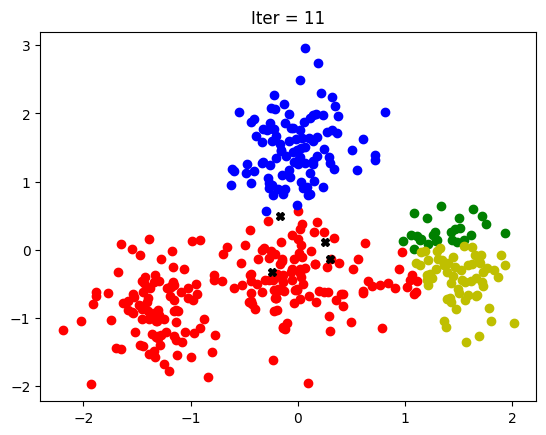

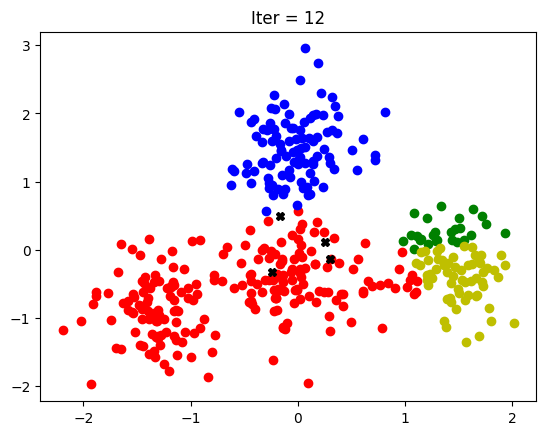

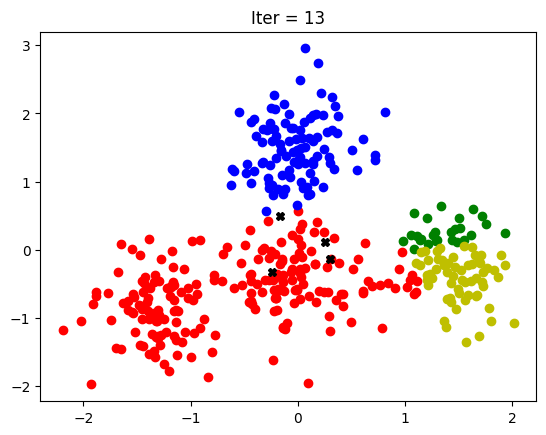

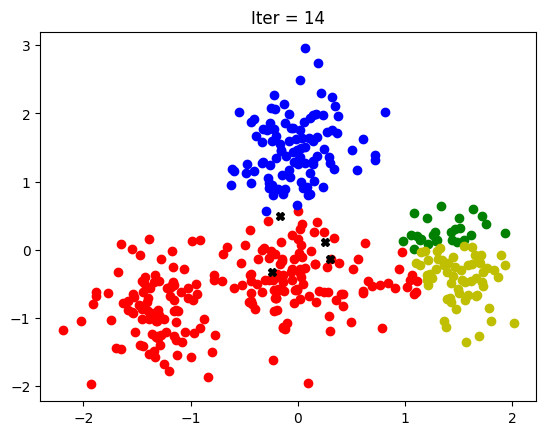

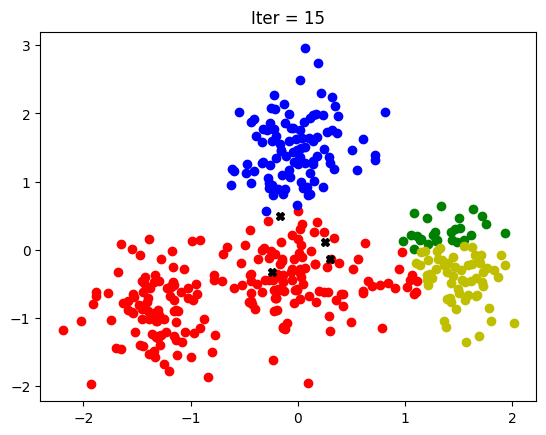

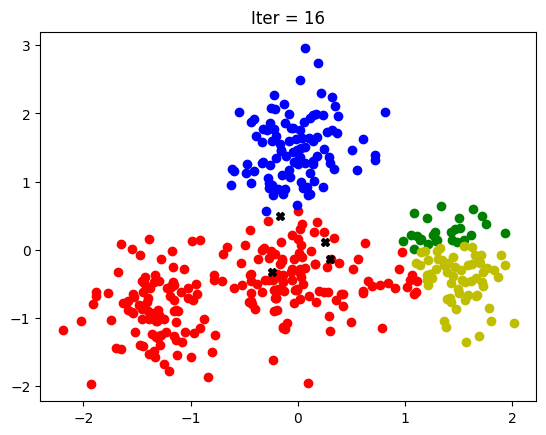

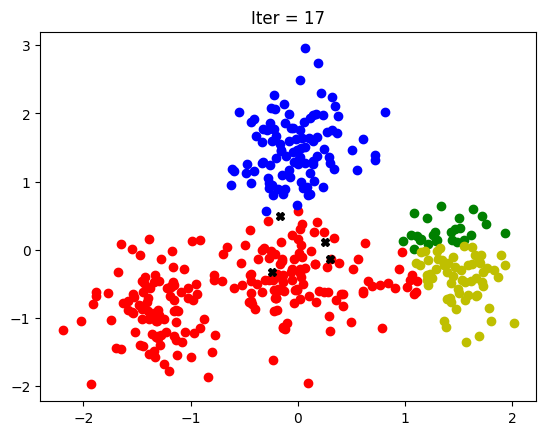

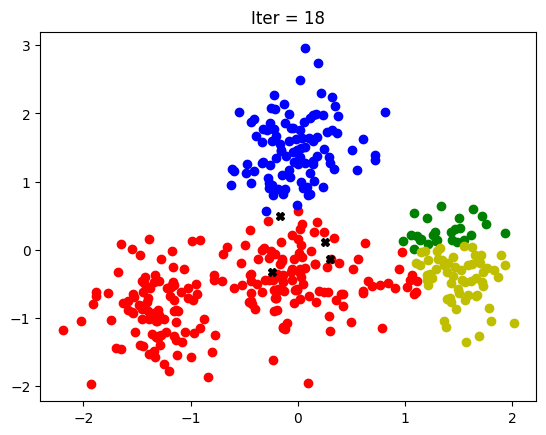

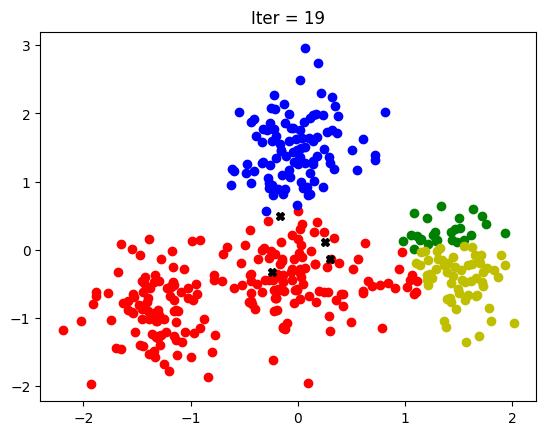

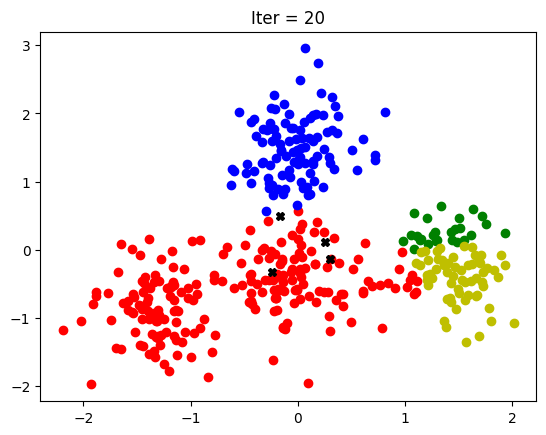

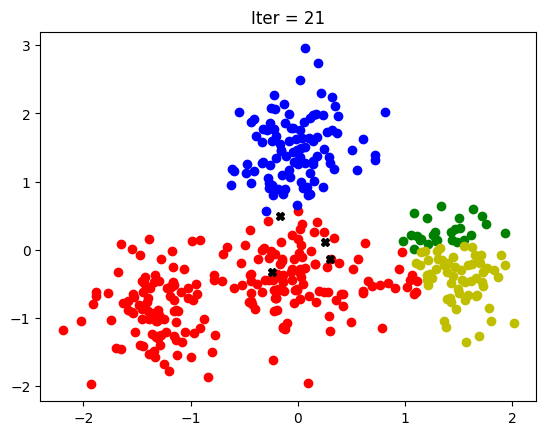

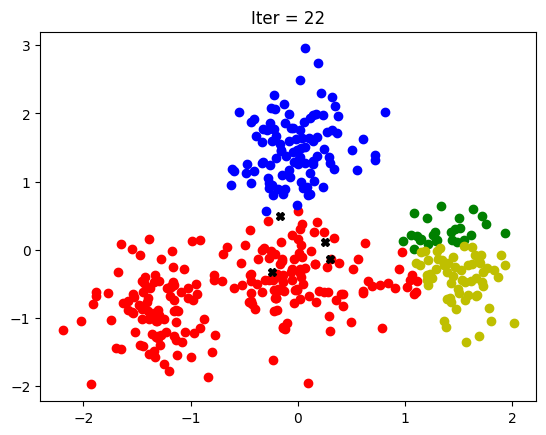

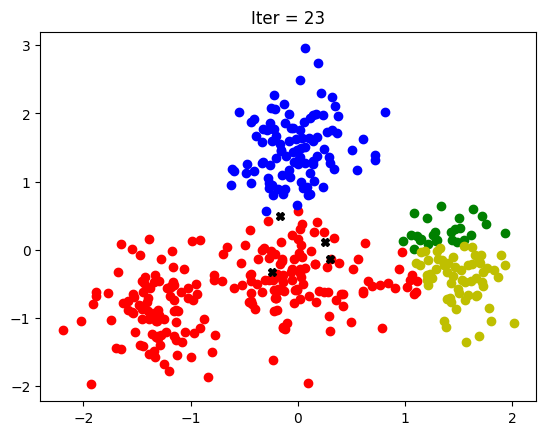

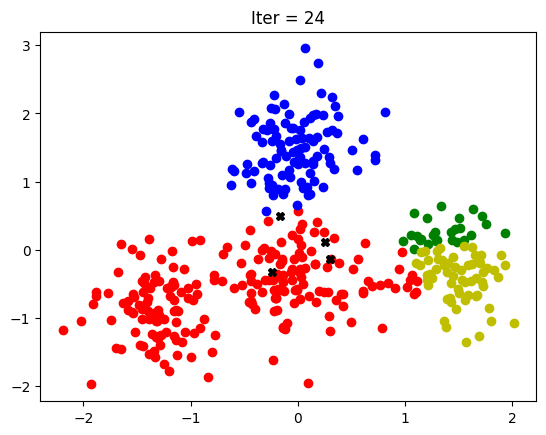

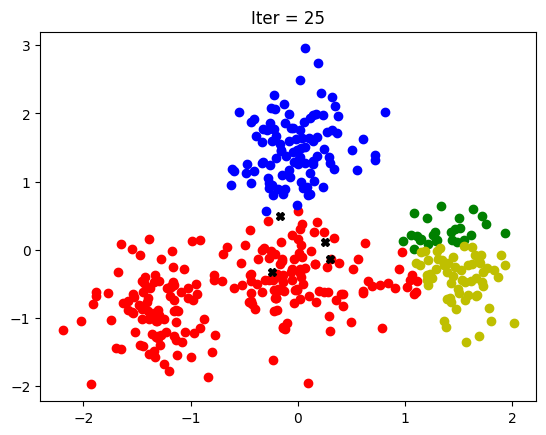

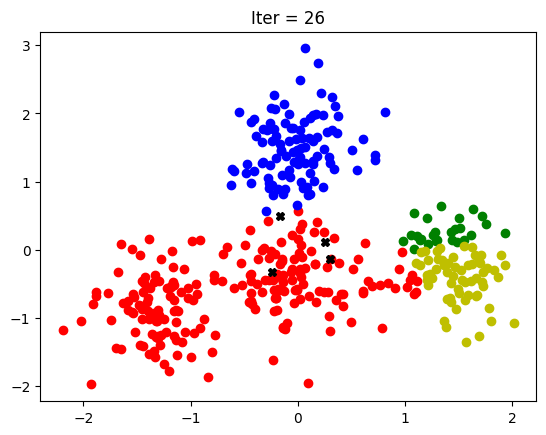

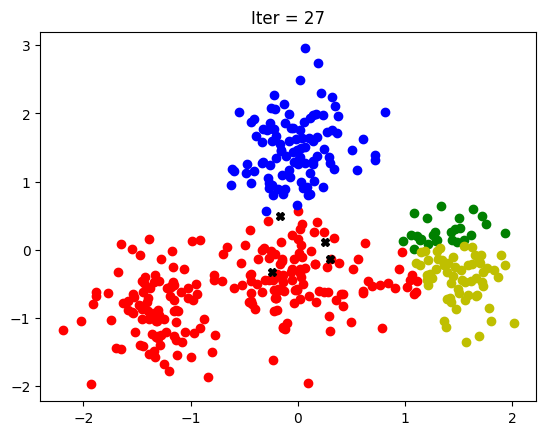

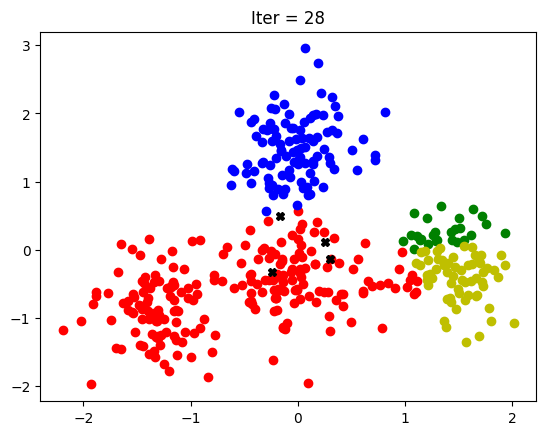

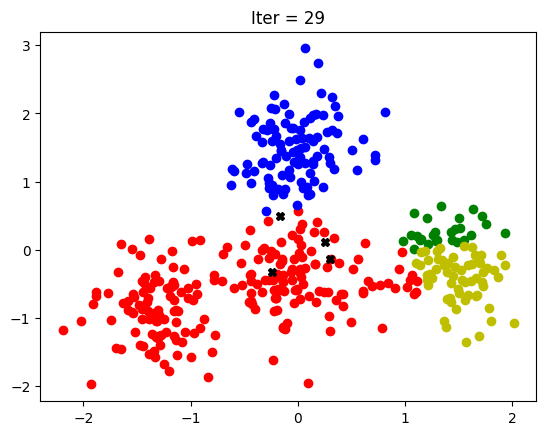

In [116]:
log_err = []
Iterations = 30
precision = 1e-10
colour = ['r','g','b','y','k','m','c']

K = 4

lamda = [mean, COV, W]

for n in range(Iterations):

    expect = calculate_Expectation(mean,COV,W)

    lable = np.argmax(expect, axis=1)

    lamda, err = re_estimation(expect)

    log_err.append(err)

    plt.figure()

    for p in range(K):
        index = np.where(lable==p)
        plt.scatter(Distribution[index,0],Distribution[index,1],color=colour[p])
    
    Centroids = lamda[0].T

    plt.plot(Centroids[:,0], Centroids[:,1], "X", color='k')
    plt.title(f"Iter = {n}")

#plt.figure()
#plt.plot(log_err)

# Practical K - means Clustering

IRIS dataset

In [8]:
import pandas as pd
import numpy as np
data = pd.read_csv('./IRIS.csv')
data[['target']] = data[['species']].apply(lambda col:pd.Categorical(col).codes)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [9]:
x = np.asarray(data[['sepal_length','sepal_width','petal_length','petal_width']].values.tolist())
y = (data[['species']].apply(lambda col:pd.Categorical(col).codes)).values.tolist()
target = np.asarray([item for sublist in y for item in sublist])

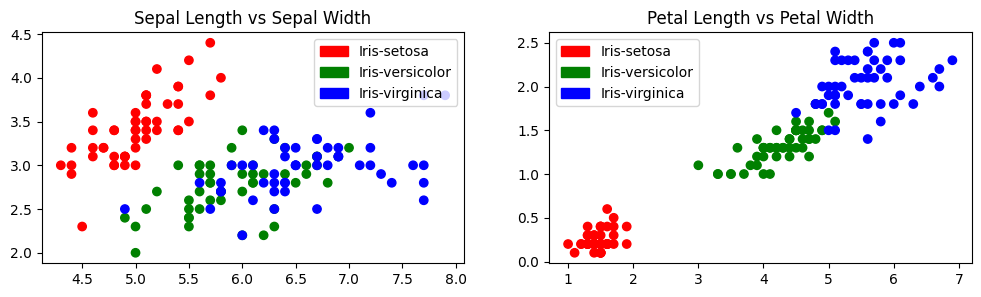

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
red_patch = mpatches.Patch(color='red', label='Iris-setosa')
green_patch = mpatches.Patch(color='green', label='Iris-versicolor')
blue_patch = mpatches.Patch(color='blue', label='Iris-virginica')

plt.subplot(1, 2, 1)
plt.scatter(data['sepal_length'], data['sepal_width'], c=colors[data['target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(data['petal_length'], data['petal_width'], c= colors[data['target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,n_init=100,max_iter=100,verbose=1)
kmeans.fit(x)

Initialization complete
Iteration 0, inertia 124.21000000000001.
Iteration 1, inertia 79.61434422799591.
Iteration 2, inertia 78.9450658259773.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 219.83.
Iteration 1, inertia 81.04960650613187.
Iteration 2, inertia 79.8179745332109.
Iteration 3, inertia 79.43376414532676.
Iteration 4, inertia 79.0107097222222.
Iteration 5, inertia 78.94506582597731.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 123.27000000000001.
Iteration 1, inertia 86.09778687119547.
Iteration 2, inertia 80.23054939305555.
Iteration 3, inertia 79.28654263977779.
Iteration 4, inertia 78.94084142614602.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 153.78.
Iteration 1, inertia 82.95893292565543.
Iteration 2, inertia 81.85008766287818.
Iteration 3, inertia 80.89577600000004.
Iteration 4, inertia 79.96297983461304.
Iteration 5, inertia 79.43376

KMeans(max_iter=100, n_clusters=3, n_init=100, verbose=1)

In [13]:
from sklearn.mixture import GaussianMixture as Gmm
gmm=Gmm(n_components=3, init_params='kmeans',covariance_type='diag',verbose=1)

In [14]:
gmm.fit(x)

Initialization 0
Initialization converged: True


GaussianMixture(covariance_type='diag', n_components=3, verbose=1)